In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import os
import cv2

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [4]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

In [5]:
len(model.layers)

22

In [6]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [7]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [8]:
betw = 'Cherry'
df = pd.read_csv('/content/drive/MyDrive/DATASET/Pixel_File_'+betw+'.csv')

In [10]:
df = df.drop(columns = 'Unnamed: 0')

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,174,172,191,179,177,196,160,160,178,157,...,156,152,171,150,146,165,148,144,163,0
1,153,149,168,141,137,156,152,148,167,154,...,126,127,147,142,143,163,139,140,160,0
2,145,146,156,137,138,148,141,143,153,136,...,79,80,84,82,83,87,84,85,89,1
3,61,59,65,60,58,64,66,64,70,71,...,160,160,166,161,161,167,159,159,165,1
4,136,142,147,152,158,163,151,157,162,150,...,95,98,103,96,100,105,93,97,102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,145,135,152,160,150,167,137,127,144,157,...,84,72,92,83,71,89,128,116,134,1
4382,111,115,120,118,122,127,100,106,111,92,...,93,96,100,92,95,100,97,100,105,1
4383,160,152,169,157,149,166,163,157,174,156,...,45,91,93,150,150,168,123,121,143,0
4384,142,141,157,141,140,156,138,137,153,139,...,159,158,174,154,154,170,157,157,174,1


In [12]:
print(len(df))
y = df.label
x = df.drop(columns = ['label'])

4386


In [13]:
print(y)
print(x)

0       0
1       0
2       1
3       1
4       1
       ..
4381    1
4382    1
4383    0
4384    1
4385    0
Name: label, Length: 4386, dtype: int64
        0    1    2    3    4    5    6    7    8    9  ...  2342  2343  2344  \
0     174  172  191  179  177  196  160  160  178  157  ...   172   156   152   
1     153  149  168  141  137  156  152  148  167  154  ...   158   126   127   
2     145  146  156  137  138  148  141  143  153  136  ...    89    79    80   
3      61   59   65   60   58   64   66   64   70   71  ...   168   160   160   
4     136  142  147  152  158  163  151  157  162  150  ...   103    95    98   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
4381  145  135  152  160  150  167  137  127  144  157  ...   119    84    72   
4382  111  115  120  118  122  127  100  106  111   92  ...   106    93    96   
4383  160  152  169  157  149  166  163  157  174  156  ...   135    45    91   
4384  142  141  157  141  140  156  138 

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [15]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

In [18]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 30,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/30
41/42 [============================>.] - ETA: 0s - loss: 0.5922 - accuracy: 0.9577

42/42 [==============================] - 4s 96ms/step - loss: 0.5921 - accuracy: 0.9580 - val_loss: 0.5218 - val_accuracy: 0.9728
Epoch 2/30
42/42 [==============================] - ETA: 0s - loss: 0.5707 - accuracy: 0.9580

42/42 [==============================] - 4s 100ms/step - loss: 0.5707 - accuracy: 0.9580 - val_loss: 0.5126 - val_accuracy: 0.9728
Epoch 3/30
41/42 [============================>.] - ETA: 0s - loss: 0.5585 - accuracy: 0.9630

42/42 [==============================] - 6s 132ms/step - loss: 0.5585 - accuracy: 0.9629 - val_loss: 0.5044 - val_accuracy: 0.9728
Epoch 4/30
41/42 [============================>.] - ETA: 0s - loss: 0.5482 - accuracy: 0.9619

42/42 [==============================] - 4s 94ms/step - loss: 0.5493 - accuracy: 0.9618 - val_loss: 0.4930 - val_accuracy: 0.9762
Epoch 5/30
41/42 [============================>.] - ETA: 0s - loss: 0.5438 - accuracy: 0.9615

42/42 [==============================] - 4s 96ms/step - loss: 0.5447 - accuracy: 0.9618 - val_loss: 0.4807 - val_accuracy: 0.9796
Epoch 6/30
41/42 [============================>.] - ETA: 0s - loss: 0.5100 - accuracy: 0.9745

42/42 [==============================] - 6s 139ms/step - loss: 0.5100 - accuracy: 0.9743 - val_loss: 0.4722 - val_accuracy: 0.9830
Epoch 7/30
41/42 [============================>.] - ETA: 0s - loss: 0.5013 - accuracy: 0.9722

42/42 [==============================] - 4s 94ms/step - loss: 0.5004 - accuracy: 0.9724 - val_loss: 0.4632 - val_accuracy: 0.9830
Epoch 8/30
41/42 [============================>.] - ETA: 0s - loss: 0.4939 - accuracy: 0.9748

42/42 [==============================] - 4s 94ms/step - loss: 0.4941 - accuracy: 0.9743 - val_loss: 0.4503 - val_accuracy: 0.9830
Epoch 9/30
42/42 [==============================] - ETA: 0s - loss: 0.4690 - accuracy: 0.9818

42/42 [==============================] - 5s 130ms/step - loss: 0.4690 - accuracy: 0.9818 - val_loss: 0.4340 - val_accuracy: 0.9898
Epoch 10/30
41/42 [============================>.] - ETA: 0s - loss: 0.4755 - accuracy: 0.9779

42/42 [==============================] - 4s 102ms/step - loss: 0.4751 - accuracy: 0.9781 - val_loss: 0.4306 - val_accuracy: 0.9864
Epoch 11/30
41/42 [============================>.] - ETA: 0s - loss: 0.4546 - accuracy: 0.9813

42/42 [==============================] - 4s 94ms/step - loss: 0.4537 - accuracy: 0.9815 - val_loss: 0.4234 - val_accuracy: 0.9864
Epoch 12/30
42/42 [==============================] - ETA: 0s - loss: 0.4623 - accuracy: 0.9766

42/42 [==============================] - 5s 118ms/step - loss: 0.4623 - accuracy: 0.9766 - val_loss: 0.4111 - val_accuracy: 0.9898
Epoch 13/30
41/42 [============================>.] - ETA: 0s - loss: 0.4462 - accuracy: 0.9829

42/42 [==============================] - 5s 115ms/step - loss: 0.4469 - accuracy: 0.9830 - val_loss: 0.4058 - val_accuracy: 0.9898
Epoch 14/30
41/42 [============================>.] - ETA: 0s - loss: 0.4389 - accuracy: 0.9813

42/42 [==============================] - 4s 96ms/step - loss: 0.4391 - accuracy: 0.9815 - val_loss: 0.3999 - val_accuracy: 0.9898
Epoch 15/30
42/42 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.9856

42/42 [==============================] - 4s 105ms/step - loss: 0.4224 - accuracy: 0.9856 - val_loss: 0.3870 - val_accuracy: 0.9898
Epoch 16/30
41/42 [============================>.] - ETA: 0s - loss: 0.4213 - accuracy: 0.9809

42/42 [==============================] - 5s 126ms/step - loss: 0.4212 - accuracy: 0.9811 - val_loss: 0.3791 - val_accuracy: 0.9898
Epoch 17/30
41/42 [============================>.] - ETA: 0s - loss: 0.4012 - accuracy: 0.9870

42/42 [==============================] - 4s 98ms/step - loss: 0.4022 - accuracy: 0.9868 - val_loss: 0.3724 - val_accuracy: 0.9898
Epoch 18/30
41/42 [============================>.] - ETA: 0s - loss: 0.3944 - accuracy: 0.9863

42/42 [==============================] - 4s 97ms/step - loss: 0.3951 - accuracy: 0.9860 - val_loss: 0.3591 - val_accuracy: 0.9898
Epoch 19/30
41/42 [============================>.] - ETA: 0s - loss: 0.3955 - accuracy: 0.9855

42/42 [==============================] - 6s 138ms/step - loss: 0.3972 - accuracy: 0.9852 - val_loss: 0.3538 - val_accuracy: 0.9898
Epoch 20/30
42/42 [==============================] - ETA: 0s - loss: 0.3908 - accuracy: 0.9864

42/42 [==============================] - 4s 94ms/step - loss: 0.3908 - accuracy: 0.9864 - val_loss: 0.3484 - val_accuracy: 0.9898
Epoch 21/30
41/42 [============================>.] - ETA: 0s - loss: 0.3733 - accuracy: 0.9851

42/42 [==============================] - 4s 94ms/step - loss: 0.3727 - accuracy: 0.9852 - val_loss: 0.3442 - val_accuracy: 0.9898
Epoch 22/30
42/42 [==============================] - ETA: 0s - loss: 0.3522 - accuracy: 0.9917

42/42 [==============================] - 6s 140ms/step - loss: 0.3522 - accuracy: 0.9917 - val_loss: 0.3323 - val_accuracy: 0.9898
Epoch 23/30
41/42 [============================>.] - ETA: 0s - loss: 0.3713 - accuracy: 0.9867

42/42 [==============================] - 4s 95ms/step - loss: 0.3712 - accuracy: 0.9868 - val_loss: 0.3258 - val_accuracy: 0.9898
Epoch 24/30
41/42 [============================>.] - ETA: 0s - loss: 0.3552 - accuracy: 0.9874

42/42 [==============================] - 4s 96ms/step - loss: 0.3552 - accuracy: 0.9875 - val_loss: 0.3184 - val_accuracy: 0.9898
Epoch 25/30
42/42 [==============================] - ETA: 0s - loss: 0.3356 - accuracy: 0.9913

42/42 [==============================] - 5s 128ms/step - loss: 0.3356 - accuracy: 0.9913 - val_loss: 0.3134 - val_accuracy: 0.9898
Epoch 26/30
41/42 [============================>.] - ETA: 0s - loss: 0.3191 - accuracy: 0.9958

42/42 [==============================] - 4s 106ms/step - loss: 0.3197 - accuracy: 0.9955 - val_loss: 0.3086 - val_accuracy: 0.9898
Epoch 27/30
41/42 [============================>.] - ETA: 0s - loss: 0.3239 - accuracy: 0.9920

42/42 [==============================] - 4s 94ms/step - loss: 0.3250 - accuracy: 0.9917 - val_loss: 0.3048 - val_accuracy: 0.9898
Epoch 28/30
42/42 [==============================] - ETA: 0s - loss: 0.3187 - accuracy: 0.9905

42/42 [==============================] - 5s 113ms/step - loss: 0.3187 - accuracy: 0.9905 - val_loss: 0.2954 - val_accuracy: 0.9898
Epoch 29/30
41/42 [============================>.] - ETA: 0s - loss: 0.3160 - accuracy: 0.9912

42/42 [==============================] - 5s 120ms/step - loss: 0.3178 - accuracy: 0.9909 - val_loss: 0.2957 - val_accuracy: 0.9898
Epoch 30/30
41/42 [============================>.] - ETA: 0s - loss: 0.3169 - accuracy: 0.9905

42/42 [==============================] - 4s 95ms/step - loss: 0.3176 - accuracy: 0.9902 - val_loss: 0.2887 - val_accuracy: 0.9898
Duration: 0:02:21.999863


In [19]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 3,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/3
41/42 [============================>.] - ETA: 0s - loss: 0.3003 - accuracy: 0.9950

42/42 [==============================] - 4s 103ms/step - loss: 0.3074 - accuracy: 0.9928 - val_loss: 0.2838 - val_accuracy: 0.9898
Epoch 2/3
41/42 [============================>.] - ETA: 0s - loss: 0.3002 - accuracy: 0.9947

42/42 [==============================] - 4s 94ms/step - loss: 0.2999 - accuracy: 0.9947 - val_loss: 0.2769 - val_accuracy: 0.9898
Epoch 3/3
42/42 [==============================] - ETA: 0s - loss: 0.2899 - accuracy: 0.9928

42/42 [==============================] - 5s 117ms/step - loss: 0.2899 - accuracy: 0.9928 - val_loss: 0.2755 - val_accuracy: 0.9898
Duration: 0:00:20.603539


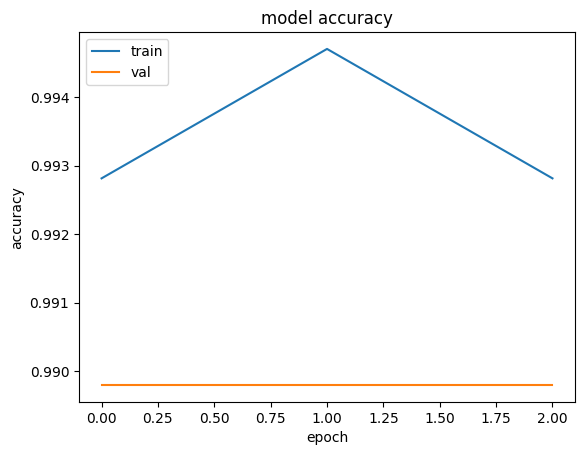

val 0.9897959232330322
min val 0.9897959232330322
acc 0.9947050213813782
mean val 0.9897959232330322


In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])


plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [21]:
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

91/91 [==============================] - 1s 13ms/step


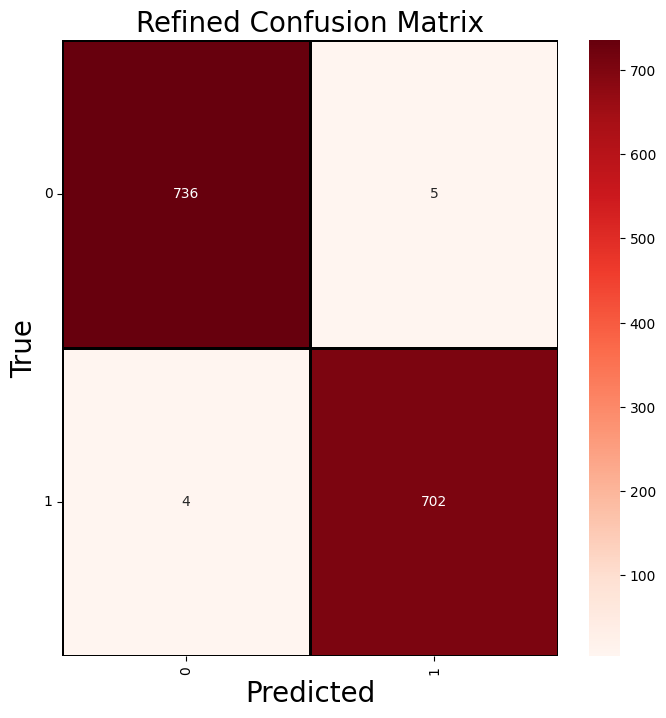

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cmap_unblended = sns.color_palette(["#f0d78d","#f0cb5b","#f2c641","#edb50e","#b38704"], as_cmap=True)
Pred = model.predict(x_test, batch_size=16)
Pred_Label = np.argmax(Pred, axis=1)
ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0,1])
cm = ConfusionM
targetnames = [0,1]
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= 'Reds', linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

ROC AUC Score=0.992


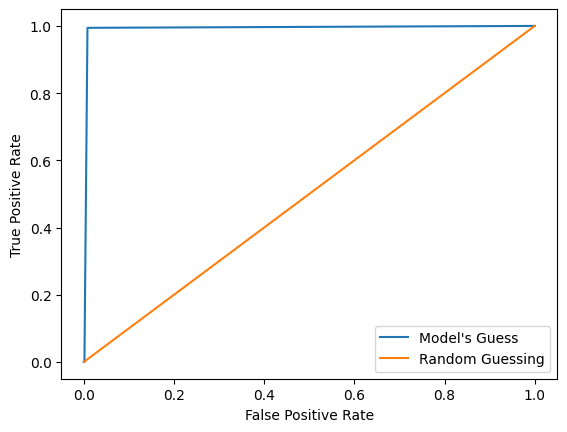

In [23]:
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Pred_Label)
# summarize scores
print('ROC AUC Score=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, Pred_Label)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, label="Model's Guess")
pyplot.plot(ns_fpr, ns_tpr, label='Random Guessing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [24]:
from sklearn.metrics import classification_report
targetnames = [0,1]
tar = []
for i in targetnames:
  tar.append(str(i))
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1], target_names=tar)

In [25]:
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.99      0.99      0.99       706

   micro avg       0.99      0.99      0.99      1448
   macro avg       0.99      0.99      0.99      1448
weighted avg       0.99      0.99      0.99      1448



In [30]:
model.save_weights('/content/drive/MyDrive/MODELS/'+betw+'/cnn_model_weights.h5')

In [31]:
model.save('/content/drive/MyDrive/MODELS/'+betw+'/cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
